In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

## 准备工作
构造各子目标label与预估分
- 128个样本
- 40%的随机正样本
- 预估分logistic

In [2]:
length = 128
y1 = np.random.binomial(1, 0.4, length) # y1 label
y1_ =[1.0/(1 + np.exp(-s)) for s in np.random.normal(-2,2,size=length)] # y1 score
#y1_ = sorted(y1_, reverse=True)
y1,len(y1_)

(array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]), 128)

In [3]:
y2 = np.random.binomial(1, 0.3, length)
y2_ =[1.0/(1 + np.exp(-s)) for s in np.random.uniform(-2,2,size=length)]
y2,len(y2_)

(array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]), 128)

## 预估值分布

(<matplotlib.collections.PathCollection at 0x7f9c2c869990>,
 <matplotlib.collections.PathCollection at 0x7f9c2c869d50>)

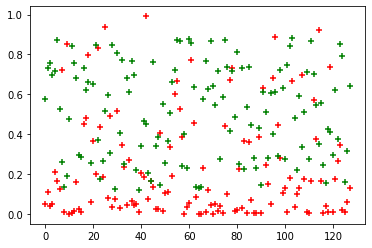

In [4]:
fig = plt.figure()
x = list(range(length))
plt.scatter(x, y1_, color='red', marker='+'),plt.scatter(x, y2_, color='green', marker='+')

### 各子目标自身的AUC

In [5]:
auc1 = roc_auc_score(y1, y1_)
auc2 = roc_auc_score(y2, y2_)
auc1, auc2

(0.5255456349206349, 0.49005847953216375)

## 两目标融合
- 累加，或者联乘
- 使用融合得分排序
- 计算对应各子目标AUC

(<matplotlib.collections.PathCollection at 0x7f94e42cedd0>,
 0.5147783251231527,
 0.575)

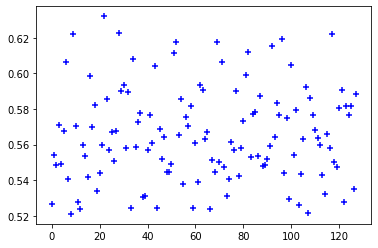

In [ ]:
y = []
for y_1, y_2 in zip(y1_, y2_):
    y.append(1.0 / ( 1.0 + np.exp(-(0.3 * (y_1+0.15) + 0.3 * y_2))))
auc1 = roc_auc_score(y1, y)
auc2 = roc_auc_score(y2, y)
plt.scatter(x, y, color='blue', marker='+'),auc1,auc2

## 总目标

In [ ]:
0.4*auc1 + 0.6*auc2

0.5509113300492611